# Разведывательный анализ данных

### Основные цели и задачи проекта:
- Провести разведывательный анализ данных, описывающих влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска

- Описание датасета

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике  

И еще один - 'studytime, granular'

In [74]:
# импортируем необходимые для работы библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [75]:
# откроем датафрейм
df = pd.read_csv('csv/stud_math.xls')
display(df)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [76]:
# посмтрим, на информацию о данных
print(f'Количество строк: {len(df)}')

df.info()   

# сразу же определим какие столбцы содержат данные  типа object. Скорее всего, большинство из них - категориальные признаки
column_types = dict(df.dtypes)

Количество строк: 395
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime

Многие столбы содержат пустые строки и "грязные" данные. Посмотрим, что с этим можно сделать. Приступим к обработке данных   
#### Столбец school не содержит пустых значение, можно посмотреть, какие данные там содержатся

In [77]:
df.school.value_counts() 

GP    349
MS     46
Name: school, dtype: int64

Всего 2 значения: GP и MS, к тому же эти переменные номинативные, признак категориальный. Можно превратить их в dummies  
В данных встречаются еще несколько столбцов с подобными данными, например, famsize или address. Для таких колоном можно написать общую функцию по созданию дамми

In [78]:
def to_dummies(df, column):
    dummie_column = pd.get_dummies(column)
    return pd.concat([df, dummie_column], axis=1)

In [79]:
# Пример использования функции
df = to_dummies(df, df.school)

#### Следующая колонка - age.  
Пустых значение там нет.  
Построим гистограмму, чтобы посмотреть, есть ли выбросы

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0, границы выбросов: [13.0, 21.0].


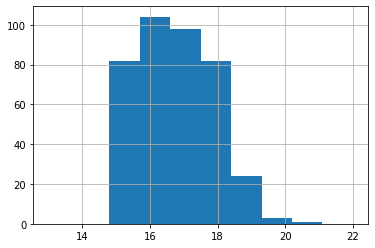

In [80]:
print(df.age.describe())
print(df.age.value_counts())

median = df.age.median()
IQR = df.age.quantile(0.75) - df.age.quantile(0.25)
perc25 = df.age.quantile(0.25)
perc75 = df.age.quantile(0.75)

print(f'25-й перцентиль: {perc25}, 75-й перцентиль: {perc75}, IQR: {IQR}, границы выбросов: [{perc25 - 1.5*IQR}, {perc75 + 1.5*IQR}].')

df.age.loc[df.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(range = (13, 22), label = 'IQR')

Все в порядке, похоже, явных выбросов нет.  

#### Теперь перейдем к колонке "пол". 
Пустых значений нет, проверим, "чистые" ли данные.

F    208
M    187
Name: sex, dtype: int64


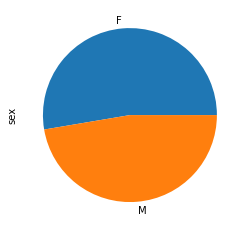

In [81]:
print(df.sex.value_counts())
df.sex.value_counts().plot.pie()

Лишних значений нет. Девушек незначительно больше.  
####  Перейдем к следующей колонке - address. 

In [82]:
df = to_dummies(df, df.sex)

Количество пропусков: 17
U    295
R     83
Name: address, dtype: int64


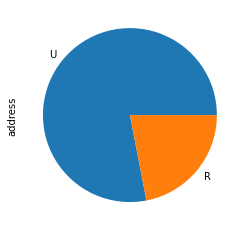

In [83]:
print(f'Количество пропусков: {len(df) - df.address.count()}')
print(df.address.value_counts())
df.address.value_counts().plot.pie()

Лишних значений нет. Большинство живет в городе. Эти данные можно будет использовать в корреляционном анализе и при заполнении пропусков.  
### Напишем функцию для заполнения проопусков таких номинативных признаков, где одно из значений сильно преобладает. Таким образом мы заполним пропуски самым частым значением.

In [84]:
# применим функцю к уже просмотренным столбцам, где точно одно из значений преобладает
df.address = df.address.apply(lambda x: None if x not in df.address.value_counts().index else x)

df.address = df.address.fillna(df.address.value_counts().index[0])
df.school = df.school.fillna(df.school.value_counts().index[0])

In [85]:
df.address.value_counts().index

Index(['U', 'R'], dtype='object')

In [86]:
df = to_dummies(df, df.address)

Следующий признак интереснее. 
#### Это размер семьи (famsize)

Количество пропусков: 27
GT3    261
LE3    107
Name: famsize, dtype: int64


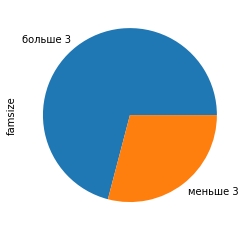

In [87]:
print(f'Количество пропусков: {len(df) - df.famsize.count()}')
print(df.famsize.value_counts())
df.famsize.value_counts().plot.pie(labels=['больше 3', 'меньше 3'])

In [88]:
# преобладание тоже явное - заполним пропуски самым частотным значением
df.famsize = df.famsize.fillna(df.famsize.value_counts().index[0])
# и превратим в дамми
df = to_dummies(df, df.famsize)

Признак номинативный, подходит для того, чтобы сдлеать dummy-переменные, поскольку по сути описывает количественные данные.  
Пусть LE3 имеет значение 0, GT3 - 1  
Заодно и пропуски заполним. Как уже было описано выше - можно создать общую функцию для создания dummies

#### Следующая колонка - Pstatus.  
Показывает живут ли родиители вместе.  
Логично предположить, что эти данные коррелируют с целевой переменной. 

Количество пропусков: 45


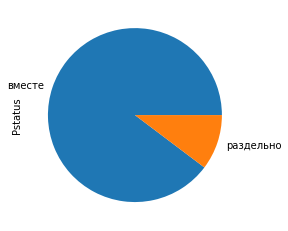

In [89]:
# 'T' - живут вместе 'A' - раздельно

print(f'Количество пропусков: {len(df) - df.Pstatus.count()}')
df.Pstatus.value_counts().plot.pie(labels=['вместе', 'раздельно'])

# пропуски лучше всего будет заполнить наиболее частотым значением, так как оно явно преобладает

Признак также может быть преобразован в дамми

In [90]:
df.Pstatus = df.Pstatus.fillna(df.Pstatus.value_counts().index[0])
df = to_dummies(df, df.Pstatus)

#### Перейдем к колонке Medu, которая отображает образование матери
0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее

тип даннных - float

Количество пропусков: 3
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64


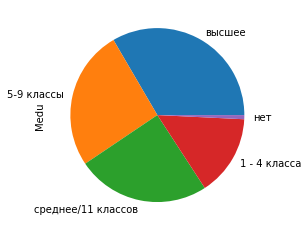

In [91]:
print(f'Количество пропусков: {len(df) - df.Medu.count()}')
# проверим, есть ли лишние значения
print(df.Medu.value_counts())

display(df.Medu.value_counts().plot.pie(labels=['высшее', '5-9 классы', 'среднее/11 классов', '1 - 4 класса', 'нет']))

Значений меньше 0 или больше 4 нет.

#### Перейдем к колонке Fedu, которая отображает образование отца
0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее

тип даннных - float

In [92]:
print(f'Количество пропусков: {len(df.Fedu) - df.Fedu.count()}')
# проверим, есть ли лишние значения
print(df.Fedu.value_counts())

Количество пропусков: 24
2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64


Видно, что есть один выброс - 40. Также в данных много пропусков

In [93]:
# построим диаграму и приведем уу в читабельный вид

education_dict = {0: 'нет', 1: '4 класса', 2: '5-9 классы', 3: 'среднее/11 классов', 4: 'высшее'}

def education_interpreting(x):
    for key, value in education_dict.items():
        if x == key:
            return value

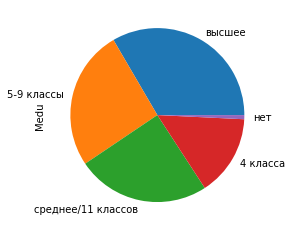

In [94]:
df.Medu.apply(education_interpreting).value_counts().plot.pie()

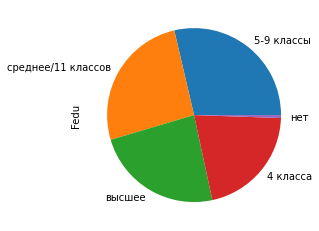

In [95]:
df.Fedu.apply(education_interpreting).value_counts().plot.pie()

Признаки Fedu и Medy одинакового типа, для их обработки можно написать общую функцию, чтобы избавить от выбросов и превратить пустые значения в None

In [96]:
# Функция для превращения пропусков в None и избавления от выбросов

def parrents_edu_normalization(x):    
    edu_value_list = [i for i in range(5)]
    return None if x not in edu_value_list or x > 4 or x < 0 else x

In [97]:
# применяем функцию
df.Fedu = df.Fedu.apply(parrents_edu_normalization)
df.Medu = df.Fedu.apply(parrents_edu_normalization)

### Mjob — работа матери 
### Fjob — работа отца 
('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)


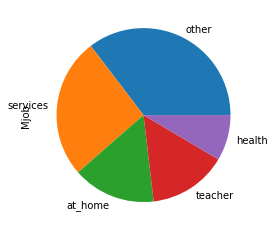

In [98]:
Mjob_values = df.Mjob.value_counts().index
Fjob_values = df.Fjob.value_counts().index

display(df.Mjob.value_counts().plot.pie(labels = Mjob_values))

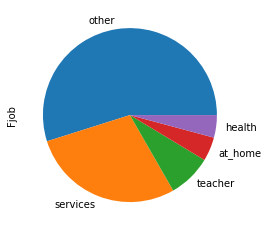

In [99]:
display(df.Fjob.value_counts().plot.pie(labels = Fjob_values))

пропуски заменить на None  

In [100]:
print(f'Количество пропусков Mjob: {len(df.Mjob) - df.Mjob.count()}')
print(f'Количество пропусков Fjob: {len(df.Fjob) - df.Fjob.count()}')

Количество пропусков Mjob: 19
Количество пропусков Fjob: 36


In [101]:
# заменяем пропуск на None
df.Mjob = df.Mjob.apply(lambda x: None if x not in Mjob_values else x)
df.Fjob = df.Fjob.apply(lambda x: None if x not in Fjob_values else x)


Кстати, other не дает никакой информации, но все же оставим это значение

Так как варианты значений професси отца и матери одинаковые, то прежде, чем преобразовывать их в дамми можно переименовать значение

In [102]:
def fjob_transform(x):
    if x == 'other':
        return 'f_job_other'
    elif x == 'services':
        return 'f_job_services'
    elif x == 'at_home':
        return 'f_job_at_home'
    elif x == 'teacher':
        return 'f_job_teacher'
    elif x == 'health':
        return 'f_job_health'
    return x

df.Fjob = df.Fjob.apply(fjob_transform)

In [103]:
# у нас уже есть колонка с названием helth, поэтому прежде, чем превращать должность мамы в dummie-переменную, переименуем признак health, да и другие тоже для большего удобства

def mjob_transform(x):
    if x == 'other':
        return 'm_job_other'
    elif x == 'services':
        return 'm_job_services'
    elif x == 'at_home':
        return 'm_job_at_home'
    elif x == 'teacher':
        return 'm_job_teacher'
    elif x == 'health':
        return 'm_job_health'
    return x

df.Mjob = df.Mjob.apply(mjob_transform)

In [104]:
df = to_dummies(df, df.Mjob)
df = to_dummies(df, df.Fjob)

### Признак 11 - reason — причина выбора школы 
('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [105]:
print(f'Количество пропусков: {len(df.reason) - df.reason.count()}')

Количество пропусков: 17


In [106]:
# посомтрим, есть ли лишние значения
df.reason.value_counts()

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

Данные относительно чистые. Можно заменить пропуски на None

In [107]:
reason_values = df.reason.value_counts().index
df.reason = df.reason.apply(lambda x: None if x not in reason_values else x)

In [108]:
def reason_transform(x):
    if x == 'other':
        return 'other_reason'
    return x

df.reason = df.reason.apply(reason_transform)

In [109]:
df = to_dummies(df, df.reason)

### ! Идея
Можно заменить все пропуски на None разом.

In [110]:
# напишем функцию, заменяющую пропуски на None

def get_none(x):
    if x not in df.values:
        return None
    else:
        return x

In [111]:
df = get_none(df)

### Cледующий признак - guardian — опекун 
('mother' - мать, 'father' - отец, 'other' - другое)

In [112]:
print(f'Количество пропусков guardian: {len(df.guardian) - df.guardian.count()}')

Количество пропусков guardian: 31


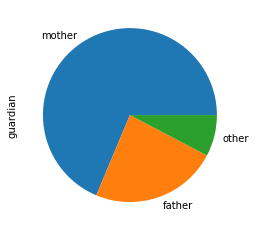

In [113]:
guardian_value = df.guardian.value_counts().index
df.guardian.value_counts().plot.pie(labels=guardian_value)

И опять "other" не дает никакой информации, признак категориальный - тоже конвертируем в дамми

In [114]:
def guardian_transform(x):
    if x == 'other':
        return 'other_guardian'
    return x

df.guardian = df.guardian.apply(guardian_transform)

In [115]:
# заменяем наиболее пропуски на mother
df.guardian = df.guardian.fillna(df.guardian.value_counts().index[0])
df = to_dummies(df, df.guardian)

In [116]:
df.guardian.count()

395

Следующие 2 признака похожи:  
- 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

- 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)


Все они числовые и указывают на количество времени на какое-то занятие  

Такие категориальные значения можно заменить за колличественные, то есть на кол-во потреченного времени. И поскольку указаны границы, а не точное время (30-60 мин), то можно брать среднее. То есть вместо "30-60 минут" будет "45".  

Единицы измерения в датафрейме разные (даже у studytime и traveltime разные). Путь все будет выраженно в минутах для точности подсчетов

In [117]:

traveltime_dict = {1: (0+15)/2, 2: (15+30)/2, 3: (30+60)/2, 4: 60}
studytime_dict = {1: 2/2 * 60, 2: (2+5)/2 * 60, 3: (5+10)/2 * 60, 4: 10 * 60}

In [118]:
def get_traveltime_amount(x):
    try:
        return traveltime_dict.get(int(x))
    except:
        return x

def get_studytime_amount(x):
    try:
        return studytime_dict.get(int(x))
    except:
        return x

In [119]:
df.traveltime = df.traveltime.apply(get_traveltime_amount)
df.studytime = df.studytime.apply(get_studytime_amount)

In [120]:
df.studytime

0      210.0
1      210.0
2      210.0
3      450.0
4      210.0
       ...  
390    210.0
391     60.0
392     60.0
393     60.0
394     60.0
Name: studytime, Length: 395, dtype: float64

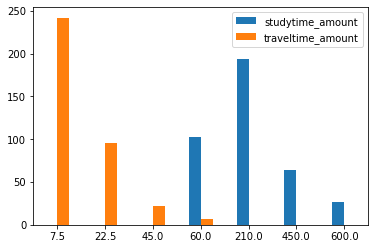

In [121]:
studytime_amount = df.studytime.value_counts()
traveltime_amount = df.traveltime.value_counts()

a = pd.DataFrame({'studytime_amount': studytime_amount, 'traveltime_amount': traveltime_amount})
a.plot.bar(rot=0)

Ого, кто-то из учеников тратит времени на дорогу столько же, сколько и на занятия.

### failures — количество внеучебных неудач 
(n, если 1<=n<3, иначе 0)

In [122]:
# выбросов нет

print(df.failures.value_counts())
print(f'Количество пропусков: {len(df) - df.failures.count()}')

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64
Количество пропусков: 22


выбросов нет

Следующие признаки однотипны:  
16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)  

Заменим yes на 1 и no на 0

In [123]:
def get_binary(x):
    if x == "yes":
        return 1
    elif x == "no":
        return 0
    return x

In [124]:
# пример применения функции
yes_no_features = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for column in yes_no_features:
    df[column] = df[column].apply(get_binary)

### 24 famrel — семейные отношения
(от 1 - очень плохо до 5 - очень хорошо)

Такие же категории и у следующих признаков:

25 freetime — свободное время после школы

26 goout — проведение времени с друзьями

27 health — текущее состояние здоровья

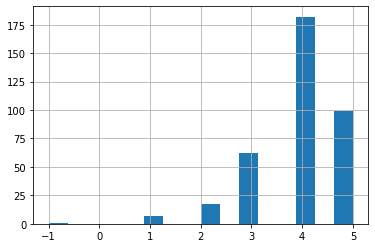

In [125]:
df.famrel.hist(bins=16)

Кажется, у нас выброс: значение не может быть -1

In [126]:
# напишем функцию для избавления от выбросов категориальных признаков, где значения представленны в виде градации 1-5
def del_oultiers_1_to_5(x):
    return None if x > 5 or x < 1 else x

In [127]:
# пример использования функции
one_to_five_features = ['famrel', 'freetime', 'goout', 'health']

for column in one_to_five_features:
    df[column] = df[column].apply(del_oultiers_1_to_5)

In [128]:
df.health

0      3.0
1      3.0
2      3.0
3      5.0
4      5.0
      ... 
390    4.0
391    2.0
392    3.0
393    5.0
394    5.0
Name: health, Length: 395, dtype: float64

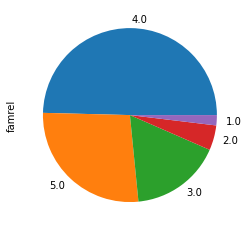

In [129]:
df.famrel.value_counts().plot.pie()

### Последний признак - 28 absences
количество пропущенных занятий

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64


0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

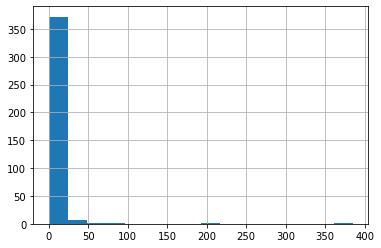

In [130]:
display(df.absences.hist(bins=16))
print(df.absences.describe())
df.absences.value_counts()

Как-то не похоже на нормальное распределение, а стандартное отклонене очень большое - 23.5  
воспользовуемся формулой интерквартильного расстояния для фильтрации выбросов

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0, границы выбросов: [-12.0, 20.0].


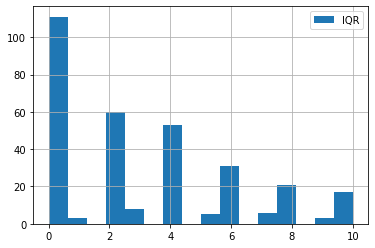

In [131]:
median = df.absences.median()
IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)

print(f'25-й перцентиль: {perc25}, 75-й перцентиль: {perc75}, IQR: {IQR}, границы выбросов: [{perc25 - 1.5*IQR}, {perc75 + 1.5*IQR}].')

df.absences.loc[df.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 16, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

И хотя верхняя граница - 20.  
Логика подсказывает, что это может быть не выбросом, а реальным количеством пропуском. Можно исключить все, что больше 30. Так как значения от 20 до 30 еще встречаются время от времени.

In [132]:
df.absences = df.absences.apply(lambda x: df.absences.mean() if x < 0 or x > 30 else x)

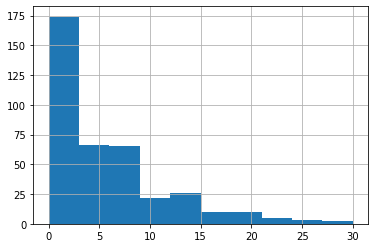

In [133]:
df.absences.hist()

## Корреляция

C:\Users\phh1\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\phh1\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


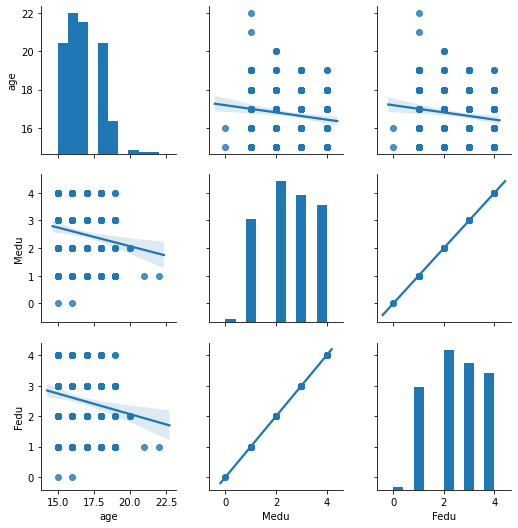

In [134]:
sns.pairplot(df[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob']], kind = 'reg')

In [135]:
# сразу же определим какие столбцы содержат данные  типа object. Скорее всего, большинство из них - категориальные признаки, которые нужно будет преобразовать в числовые или dummies(+исключить прежние)
column_types = dict(df.dtypes)
column_types

{'school': dtype('O'),
 'sex': dtype('O'),
 'age': dtype('int64'),
 'address': dtype('O'),
 'famsize': dtype('O'),
 'Pstatus': dtype('O'),
 'Medu': dtype('float64'),
 'Fedu': dtype('float64'),
 'Mjob': dtype('O'),
 'Fjob': dtype('O'),
 'reason': dtype('O'),
 'guardian': dtype('O'),
 'traveltime': dtype('float64'),
 'studytime': dtype('float64'),
 'failures': dtype('float64'),
 'schoolsup': dtype('float64'),
 'famsup': dtype('float64'),
 'paid': dtype('float64'),
 'activities': dtype('float64'),
 'nursery': dtype('float64'),
 'studytime, granular': dtype('float64'),
 'higher': dtype('float64'),
 'internet': dtype('float64'),
 'romantic': dtype('float64'),
 'famrel': dtype('float64'),
 'freetime': dtype('float64'),
 'goout': dtype('float64'),
 'health': dtype('float64'),
 'absences': dtype('float64'),
 'score': dtype('float64'),
 'GP': dtype('uint8'),
 'MS': dtype('uint8'),
 'F': dtype('uint8'),
 'M': dtype('uint8'),
 'R': dtype('uint8'),
 'U': dtype('uint8'),
 'GT3': dtype('uint8'),
 'L

В категориальные: school, sex, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian

Готово: school, address, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian

In [136]:
# посмотрим на все оставшиеся колонки
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score', 'GP', 'MS', 'F',
       'M', 'R', 'U', 'GT3', 'LE3', 'A', 'T', 'm_job_at_home', 'm_job_health',
       'm_job_other', 'm_job_services', 'm_job_teacher', 'f_job_at_home',
       'f_job_health', 'f_job_other', 'f_job_services', 'f_job_teacher',
       'course', 'home', 'other_reason', 'reputation', 'father', 'mother',
       'other_guardian'],
      dtype='object')

In [137]:
# чуть не упустила из внимания еще один празнак - studytime, granular
df[['studytime, granular', 'studytime']].corr()

,"studytime, granular",studytime
"studytime, granular",1.000000,-0.990937
studytime,-0.990937,1.000000


Корреляция большая - 1 признак можно удалить. Пусть это будет studytime, granular

In [138]:
df = df.drop(['studytime, granular'], axis=1)

In [270]:
# удаляем все столбцы, которые преобразовывали в дамми
# df = df.drop(['school', 'sex', 'address', 'reason', 'Mjob', 'Fjob', 'reason', 'guardian'], axis=1)

In [147]:
# разделим на небольшие связанные сегменты данных, чтобы можно было посмотрить понятную тепловую карту

# все, что зависит лично от студента
df_student = df[['age', 'traveltime', 'studytime', 'failures', 'nursery', 'paid', 'activities', 'higher', 'internet', 'romantic', 'freetime', 'goout', 'health', 'absences','GP', 'MS', 'F', 'M', 'course', 'home', 'other_reason', 'reputation', 'score']]

# все, что связанно с мамой
df_mother = df[['Medu', 'mother', 'm_job_at_home', 'm_job_health', 'm_job_other', 'm_job_services', 'm_job_teacher', 'score']]

# все, что связанно с папой
df_father = df[['Fedu', 'father', 'f_job_at_home', 'f_job_health', 'f_job_other', 'f_job_services', 'f_job_teacher', 'score']]

# все, что связанно с семьей в целом
df_family_state = df[['R', 'U', 'famsize', 'Pstatus', 'famsup', 'GT3', 'LE3', 'A', 'T', 'other_guardian', 'score']]

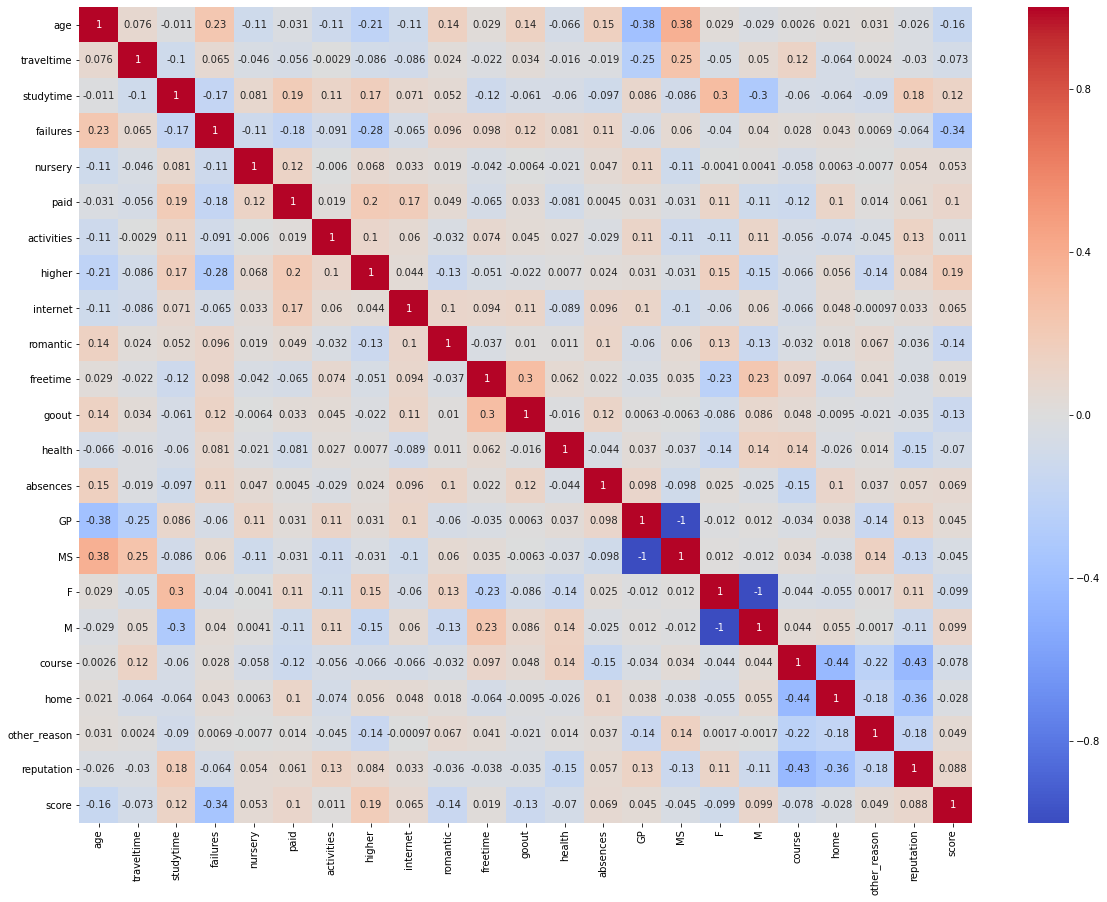

In [141]:
correlation = df_student.corr()

fig = plt.figure(figsize=(20,15))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

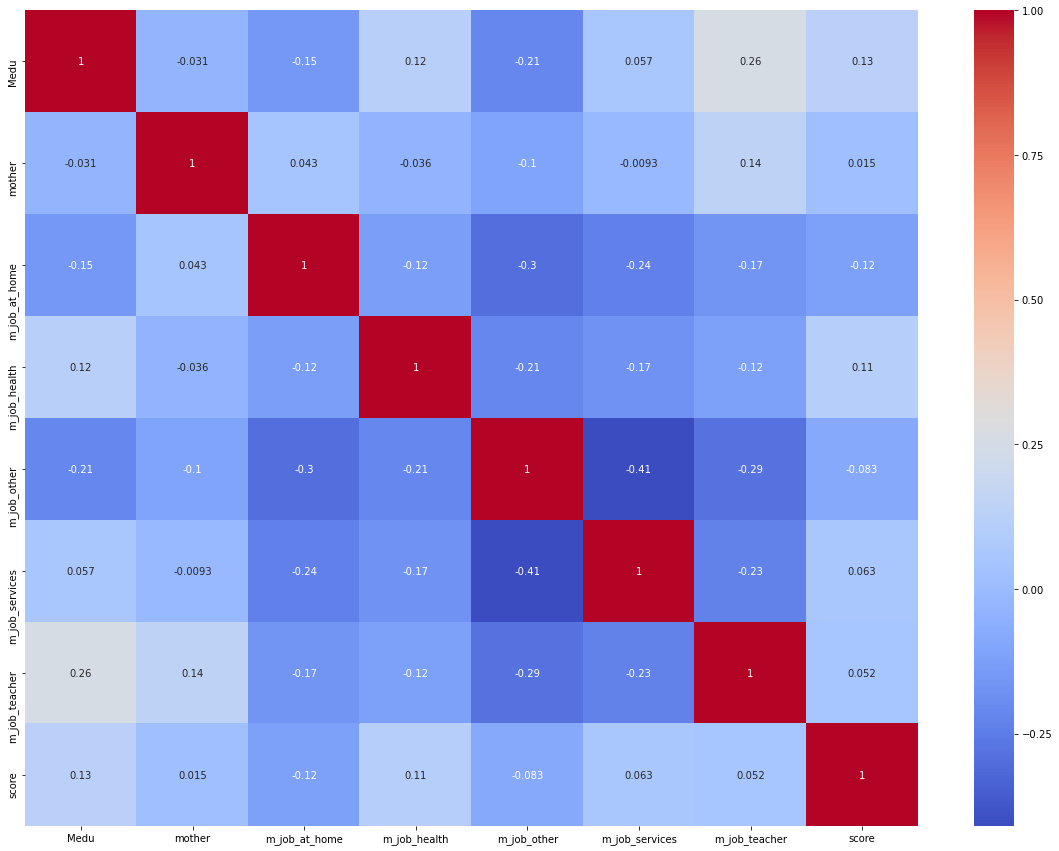

In [148]:
correlation = df_mother.corr()

fig = plt.figure(figsize=(20,15))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

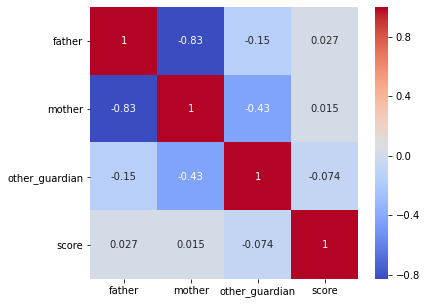

In [149]:
correlation = df_3.corr()

fig = plt.figure(figsize=(6,5))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

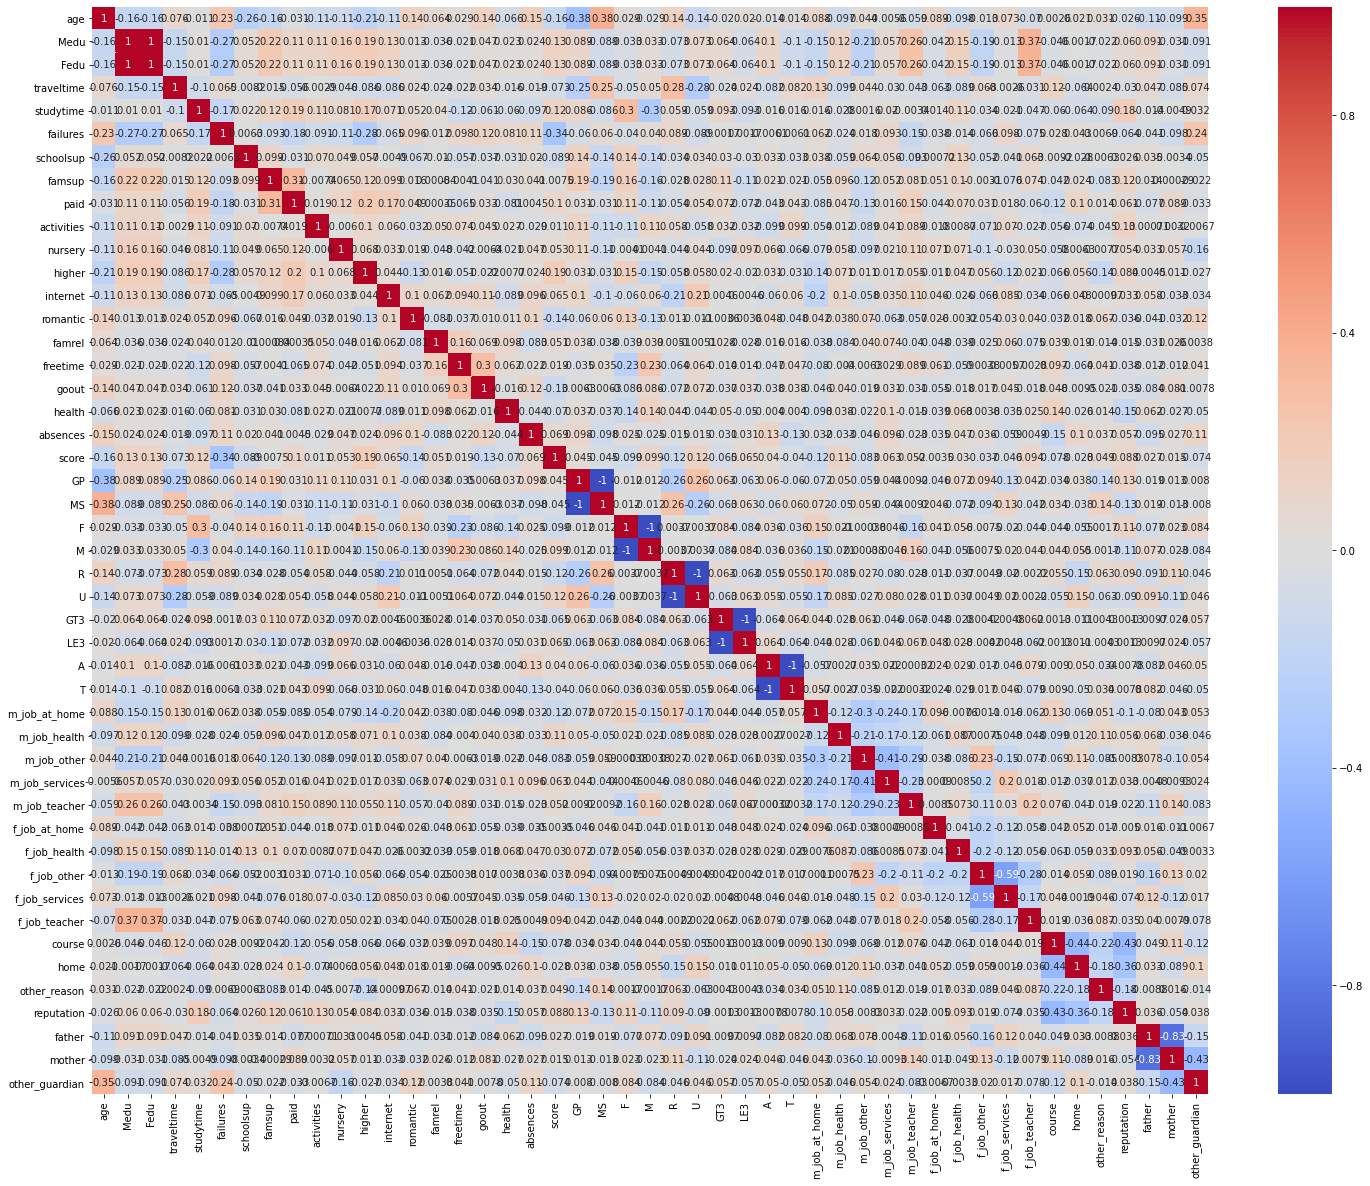

In [146]:
# для общего представления

correlation = df.corr()

fig = plt.figure(figsize=(25,20))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

Есть взаимозависимые признаки, типа пола, которые можно исключить

# Итак, выводы:
- В данных мало пустых значений, многие колонки были без пропусков
- Если встречались пропуски и 1) их было немного, 2)одно из значений признака сильно преобладало, то я заменяла пропуски на наиболее частотное значение
- В датасете встречались колонки с номиративными категориальными признаками, многие из которых я преобразовала в дамми, написав общую функцию для удобства
- в ДС было много колонок со значениями "yes", "no", которые я преобразовала в бинарные значения
- старалась переводить категориальные значения в числовые, где возможно. Например, в признаках, покаывющих время, затрачиваемое на дорогу до школы и на занятия
- время лучше переводить в единую единицу измерения

## корреляция: 
- взаимозависмые или вырожденные признаки можно исключить, а таких много: в основном, это те признаки, где было всего 2 категории, например, пол, школа, опекун и т.д.
- есть высоко-коррелирующие признаки, как оказалось, школа, которую посещает студент зависит от того, где он живет - в городе или нет, значит, можно сделать вывод, что MS - сельская школа, также с эти признаком сильно коррелирует возраст
- также можно посмотрть, на что влияет пол, так, например, девушки тратят больше времени на учебу и меньше на прогулки с друзьями, а балл по экзмену по математике у них меньше